In [11]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pydotplus
from sklearn import neighbors


In [2]:
data=pd.read_csv('ML_dataset.csv',sep=',')

In [3]:
data

,label,left_up,mid_up,right_up,left_mid,right_mid,left_down,mid_down,right_down
0,0,-1,0,0,0,1,0,-1,0
1,0,0,1,0,0,-1,0,0,1
2,0,-1,1,0,0,0,0,0,0
3,0,0,0,-1,0,1,0,0,0
4,0,0,1,0,-1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
317,3,0,0,0,-1,-1,0,0,1
318,3,0,0,0,-1,0,1,1,0
319,3,0,0,1,0,-1,0,0,0
320,3,-1,1,0,1,1,0,-1,1


In [4]:
label=data['label']
feature=data.drop(['label'],axis=1)

In [5]:
label=np.array(label)
feature=np.array(feature)
feature, label = shuffle(feature, label, random_state=0)
feature_train,feature_test,label_train,label_test=train_test_split(feature,label , test_size=0.3)

In [6]:
clf=tree.DecisionTreeClassifier(criterion='gini').fit(feature_train,label_train)
predict=clf.predict(feature_test)

<function matplotlib.pyplot.show(close=None, block=None)>

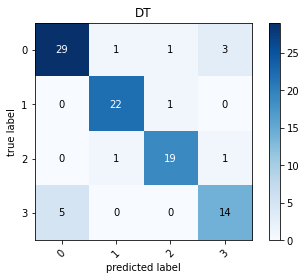

In [7]:
column_name=[0,1,2,3]
tree=confusion_matrix(label_test,predict)
figuer,ax=plot_confusion_matrix(conf_mat=tree,show_absolute=True,show_normed=False,colorbar=True,class_names=column_name)
plt.title('DT')
plt.show

In [12]:
re=recall_score(label_test,predict, average=None)
precisi=precision_score(label_test,predict, average=None)
dict={
    'label':[0,1,2,3],
    'recall_score':re,
    'precision_score':precisi,
}
report_df = pd.DataFrame(dict)
print("accuarcy: "+str(clf.score(feature_test,label_test)))
print("Mean Absolute Error:",mean_absolute_error(label_test, predict))

accuarcy: 0.865979381443299
Mean Absolute Error: 0.30927835051546393


In [13]:
report_df

,label,recall_score,precision_score
0,0,0.852941,0.852941
1,1,0.956522,0.916667
2,2,0.904762,0.904762
3,3,0.736842,0.777778
